In [ ]:
# title: "Analysis of scRNAseq from ifns-immune" 
# date: 01102025
# author: Shanel M Tsuda
### ifns-immune/IFN_celltype_seurat_objects_NM.tar.gz
### UUID: 812f133b-7974-466f-804f-a9e996dc9b3a

In [12]:
# Set up workspace
set.seed(123)

library(dplyr)
library(devtools)
library(Seurat)
library(RColorBrewer)
library(SingleCellExperiment)
library(ggplot2)
library(SingleR)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

ERROR: Error in library(SingleR): there is no package called ‘SingleR’


In [1]:
# Fetch data from HISE into input folder

file_ids <- list('812f133b-7974-466f-804f-a9e996dc9b3a')
hise::readFiles(file_ids)

[1] "downloading fileID 812f133b-7974-466f-804f-a9e996dc9b3a"


[[1]]
[[1]]$descriptors
[[1]]$descriptors$lastUpdated
[1] "2025-03-06T21:53:30.827Z"

[[1]]$descriptors$labLastModified
[1] "0001-01-01T00:00:00Z"

[[1]]$descriptors$surveyLastModified
[1] "0001-01-01T00:00:00Z"

[[1]]$descriptors$sample
[[1]]$descriptors$sample$id
[1] "00000000-0000-0000-0000-000000000000"

[[1]]$descriptors$sample$bridgingControl
[1] ""

[[1]]$descriptors$sample$sampleKitGuid
[1] ""

[[1]]$descriptors$sample$visitName
[1] ""

[[1]]$descriptors$sample$visitDetails
[1] ""

[[1]]$descriptors$sample$drawDate
[1] "0001-01-01T00:00:00Z"

[[1]]$descriptors$sample$daysSinceFirstVisit
[1] ""

[[1]]$descriptors$sample$diseaseStatesRecordedAtVisit
NULL


[[1]]$descriptors$specimens
list()

[[1]]$descriptors$file
[[1]]$descriptors$file$id
[1] "812f133b-7974-466f-804f-a9e996dc9b3a"

[[1]]$descriptors$file$name
[1] "ifns-immune/IFN_celltype_seurat_objects_NM.tar.gz"

[[1]]$descriptors$file$batchID
[1] ""

[[1]]$descriptors$file$panel
[1] ""

[[1]]$descriptors$file$pool
[1] ""

[[1]]$descriptors$file$fileType
[1] "gz#derived"

[[1]]$descriptors$file$userTags
named list()

[[1]]$descriptors$file$majorVersion
[1] ""


[[1]]$descriptors$subject
[[1]]$descriptors$subject$id
[1] "00000000-0000-0000-0000-000000000000"

[[1]]$descriptors$subject$biologicalSex
[1] ""

[[1]]$descriptors$subject$birthYear
[1] 0

[[1]]$descriptors$subject$ethnicity
[1] ""

[[1]]$descriptors$subject$partnerCode
[1] ""

[[1]]$descriptors$subject$race
[1] ""

[[1]]$descriptors$subject$subjectGuid
[1] ""


[[1]]$descriptors$cohort
[[1]]$descriptors$cohort$cohortGuid
[1] ""


[[1]]$descriptors$lab
[[1]]$descriptors$lab$id
[1] "00000000-0000-0000-0000-000000000000"

[[1]]$descriptors$lab$sampleKitGuid
[1] ""

[[1]]$descriptors$lab$labResults
NULL

[[1]]$descriptors$lab$revisionHistory
NULL

[[1]]$descriptors$lab$revisionNumber
[1] 0


[[1]]$descriptors$emr
NULL


[[1]]$file
[1] "/home/workspace/input/2347505384/ifns-immune/812f133b-7974-466f-804f-a9e996dc9b3a/ifns-immune/IFN_celltype_seurat_objects_NM.tar.gz"

[[1]]$fileType
[1] "gz#derived"

[[1]]$id
[1] "812f133b-7974-466f-804f-a9e996dc9b3a"

[[1]]$downloadPath
[1] "/home/workspace/input/2347505384/ifns-immune/812f133b-7974-466f-804f-a9e996dc9b3a/ifns-immune/IFN_celltype_seurat_objects_NM.tar.gz"

[[1]]$status
[1] TRUE

[[1]]$message
[1] "OK"

In [2]:
# Extract files from zip folder

## get filepath
filename <- '/home/workspace/input/2347505384/ifns-immune/812f133b-7974-466f-804f-a9e996dc9b3a/ifns-immune/IFN_celltype_seurat_objects_NM.tar.gz'
## list files contained in zip folder
untar(filename, list=TRUE)
## extract files from folder
untar(filename)

[1] "seurat_objects/Bcell_so.rds"    "seurat_objects/Monocyte_so.rds"
[3] "seurat_objects/NK_so.rds"       "seurat_objects/Tcell_so.rds"

In [2]:
# Read in RDS file 
ifn <- readRDS('./seurat_objects/Tcell_so.rds')

In [3]:
head(ifn)

,barcodes,batch_id,cell_name,cell_uuid,celltype.l1,celltype.l1.score,celltype.l2,celltype.l2.score,celltype.l3,celltype.l3.score,⋯,pct_counts_mt,Tcellsubset,nCount_RNA,nFeature_RNA,DonorID,Description,Subtype,RNA_snn_res.0.8,seurat_clusters,RNA_snn_res.2
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>
5fce55c46f2611eea0bd1a1bef053972,5fce55c46f2611eea0bd1a1bef053972,EXP-00602-PB,godsent_feldspar_fawn,5fce55c46f2611eea0bd1a1bef053972,CD4 T,0.8727226,CD4 Naive,0.4990148,CD4 Naive,0.4990148,⋯,2.383532,CD4 Naive,2769,1850,3955BW,none,CD4 Naive,4,0,0
5fce56a06f2611eea0bd1a1bef053972,5fce56a06f2611eea0bd1a1bef053972,EXP-00602-PB,lucid_left_ambushbug,5fce56a06f2611eea0bd1a1bef053972,CD4 T,0.9857875,CD4 TCM,0.9000435,CD4 TCM_1,0.7190213,⋯,2.366646,CD4 Memory,8155,3954,3955BW,none,CD4 Memory,5,20,20
5fce57366f2611eea0bd1a1bef053972,5fce57366f2611eea0bd1a1bef053972,EXP-00602-PB,long_reddish_gypsymoth,5fce57366f2611eea0bd1a1bef053972,CD4 T,0.9581839,CD4 TCM,0.8842212,CD4 TCM_1,0.8842212,⋯,1.897436,CD4 Memory,1950,1440,3955BW,none,CD4 Memory,3,4,4
5fce57ae6f2611eea0bd1a1bef053972,5fce57ae6f2611eea0bd1a1bef053972,EXP-00602-PB,camouflage_antisolar_bunny,5fce57ae6f2611eea0bd1a1bef053972,other T,0.6844122,gdT,0.6844122,gdT_2,0.5340025,⋯,1.950128,gdT,3128,2025,3955BW,none,gdT,17,29,29
5fce58306f2611eea0bd1a1bef053972,5fce58306f2611eea0bd1a1bef053972,EXP-00602-PB,deep_gratis_dorking,5fce58306f2611eea0bd1a1bef053972,CD4 T,0.5038731,CD8 Naive,0.4961269,CD4 Naive,0.4746799,⋯,3.937861,CD8 Naive,2768,1828,3955BW,none,CD8 Naive,0,11,11
5fce589e6f2611eea0bd1a1bef053972,5fce589e6f2611eea0bd1a1bef053972,EXP-00602-PB,antelopine_regretful_porpoise,5fce589e6f2611eea0bd1a1bef053972,CD4 T,1.0000000,CD4 TCM,0.7925629,CD4 TCM_2,0.4769113,⋯,2.322946,CD4 Memory,3530,2290,3955BW,none,CD4 Memory,3,7,7
5fce59166f2611eea0bd1a1bef053972,5fce59166f2611eea0bd1a1bef053972,EXP-00602-PB,prosperous_germinable_arawana,5fce59166f2611eea0bd1a1bef053972,CD4 T,1.0000000,CD4 Naive,0.5622456,CD4 Naive,0.5622456,⋯,3.683879,CD4 Memory,3176,2072,3955BW,none,CD4 Memory,1,4,4
5fce59846f2611eea0bd1a1bef053972,5fce59846f2611eea0bd1a1bef053972,EXP-00602-PB,dim_dumpy_xoni,5fce59846f2611eea0bd1a1bef053972,CD4 T,0.9749402,CD4 Naive,0.9730860,CD4 Naive,0.9730860,⋯,1.991663,CD4 Naive,2159,1506,3955BW,none,CD4 Naive,1,22,22
5fce59f26f2611eea0bd1a1bef053972,5fce59f26f2611eea0bd1a1bef053972,EXP-00602-PB,supersweet_prim_sunfish,5fce59f26f2611eea0bd1a1bef053972,CD4 T,0.5465996,CD4 Naive,0.5355153,CD4 Naive,0.5355153,⋯,2.472836,CD8 Naive,2669,1837,3955BW,none,CD8 Naive,0,8,8


In [5]:
ifn

An object of class Seurat 
16631 features across 360556 samples within 1 assay 
Active assay: RNA (16631 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [21]:
colnames(x = ifn[[]])

[1] "barcodes"                 "batch_id"                
 [3] "cell_name"                "cell_uuid"               
 [5] "celltype.l1"              "celltype.l1.score"       
 [7] "celltype.l2"              "celltype.l2.score"       
 [9] "celltype.l3"              "celltype.l3.score"       
[11] "chip_id"                  "nFeaturess_RNA"          
[13] "n_mito_umis"              "n_reads"                 
[15] "n_umis"                   "original_barcodes"       
[17] "pool_id"                  "sampleID"                
[19] "well_id"                  "batch"                   
[21] "batchID"                  "condition1"              
[23] "celltype1"                "nFeaturess_RNA_by_counts"
[25] "total_counts"             "total_counts_mt"         
[27] "pct_counts_mt"            "Tcellsubset"             
[29] "nCount_RNA"               "nFeature_RNA"            
[31] "DonorID"                  "Description"             
[33] "Subtype"                  "RNA_snn_res.0.8"         
[35] "seurat_clusters"          "RNA_snn_res.2"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



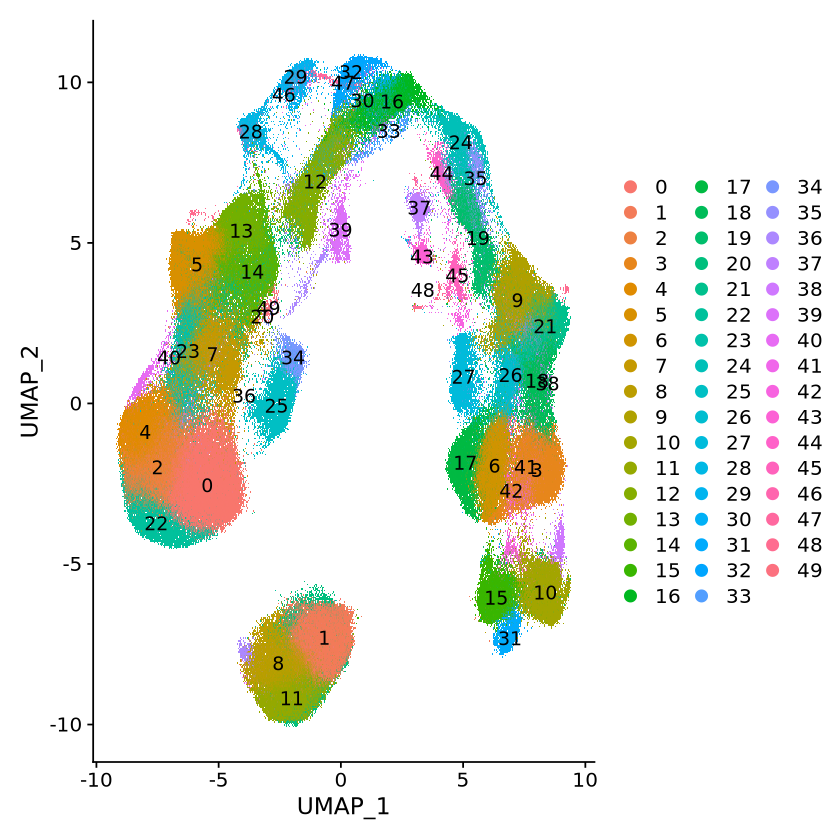

In [8]:
DimPlot(ifn, label = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



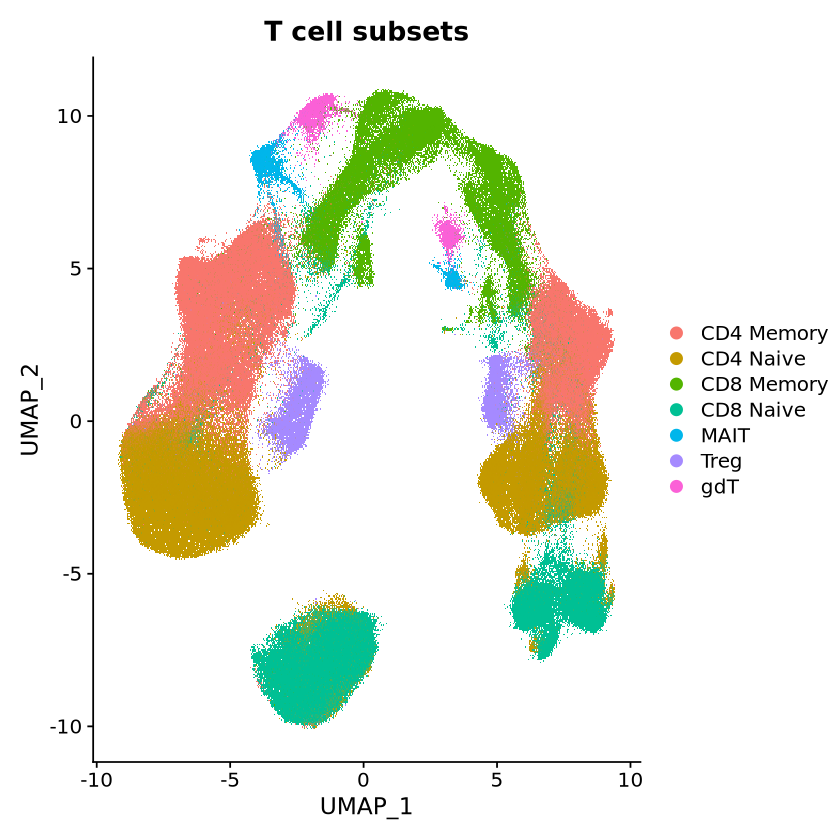

In [25]:
DimPlot(ifn, group.by="Tcellsubset") +
    ggtitle("T cell subsets")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



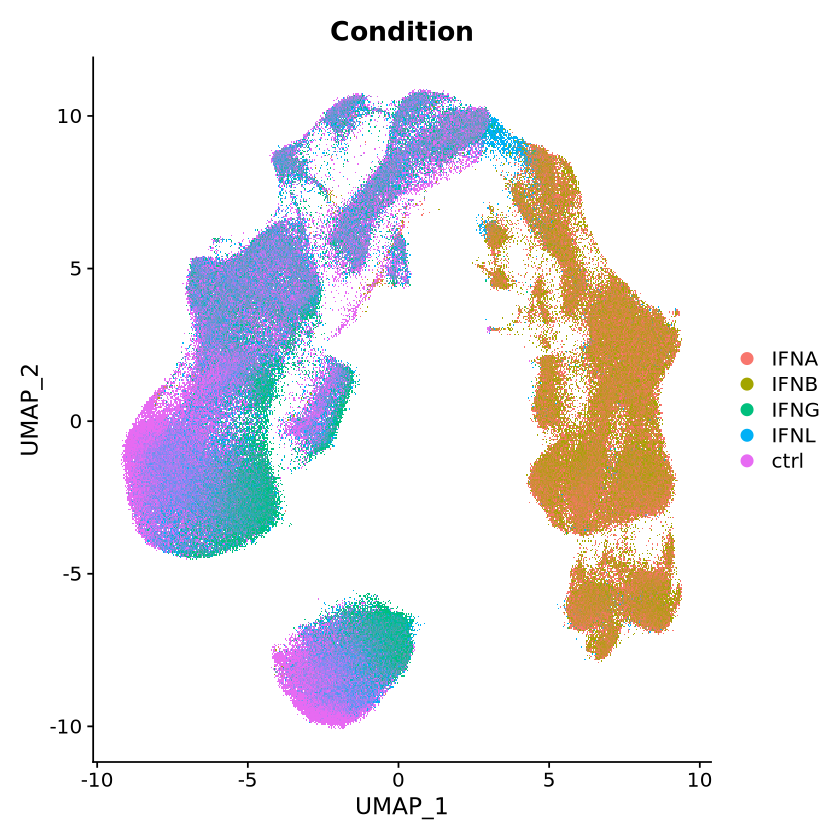

In [24]:
DimPlot(ifn, group.by="condition1") +
    ggtitle("Condition")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


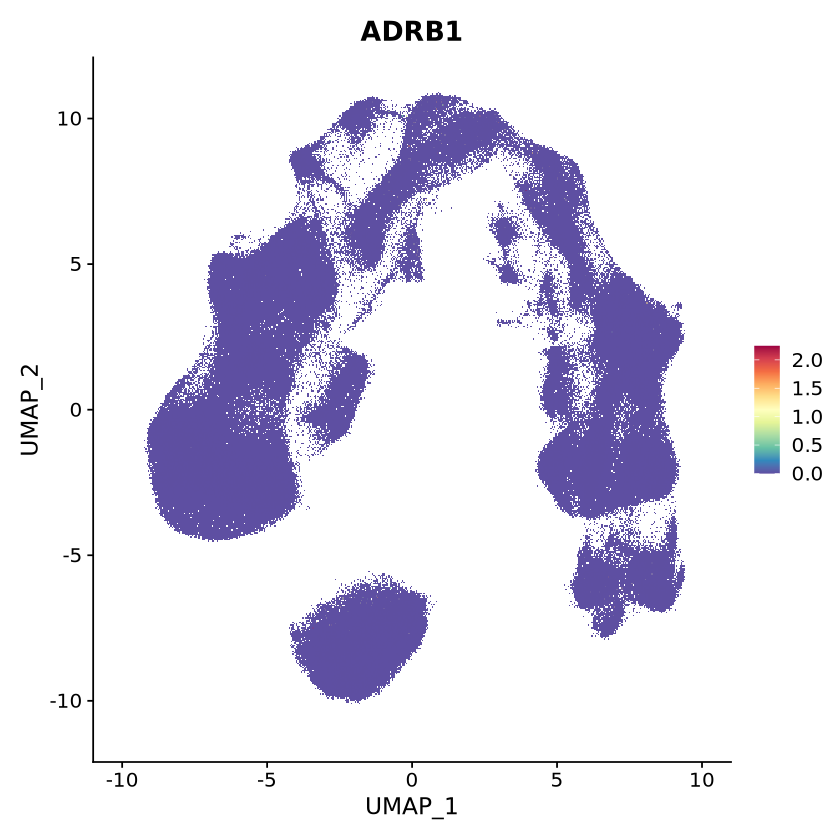

In [14]:
FeaturePlot(ifn,"ADRB1") + 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral"))) + ggtitle("ADRB1")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


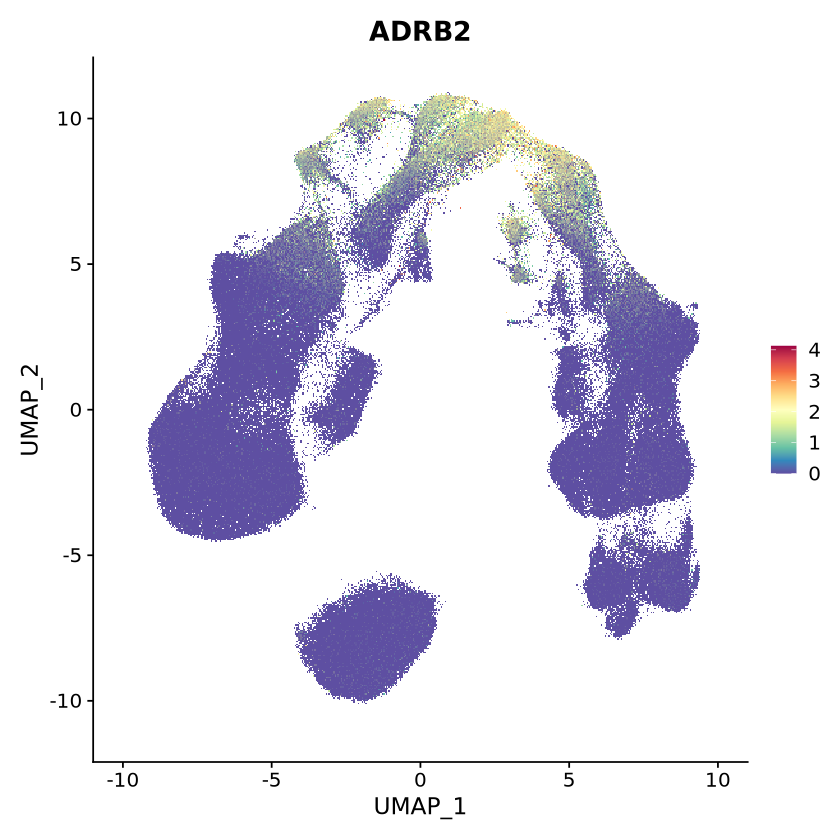

In [15]:
FeaturePlot(ifn,"ADRB2") + 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral"))) + ggtitle("ADRB2")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


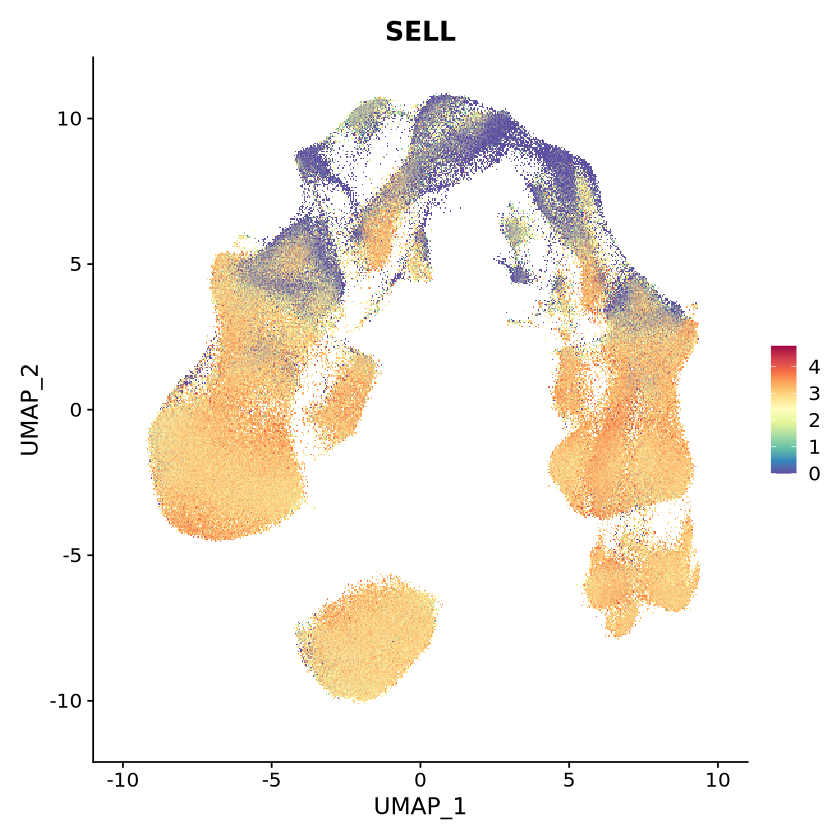

In [29]:
FeaturePlot(ifn,"SELL") + 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral"))) + ggtitle("SELL")